<a href="https://colab.research.google.com/github/ShawnSchmucker/MAE-494-Fall-2022/blob/main/MAE_494_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

(1) Minimize $\sum_{i=1}^{11} (\hat{p} - p_i)^2$ with respect to $A_{12}$ and $A_{21}$, where $\hat{p}$ is the predicted pressure based on the model due to $A_{12}$ and $A_{21}$, and $p_i$ is the $i$th data point.

(2)

In [80]:
import math
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

p = torch.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5], requires_grad=False)
x = torch.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], requires_grad=False)
p1 = 10 ** (8.07131 - 1730.63 / (20 + 233.426))
p2 = 10 ** (7.43155 - 1554.679 / (20 + 240.337))

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)

t = 0.5
epsilon = 1e-6
a = 0.0001

pressure = x * torch.exp(A[0] * (A[1] * (1 - x) / (A[0] * x + A[1] * (1 - x))) ** 2) * p1 + (1 - x) * torch.exp(A[1] * (A[0] * x / (A[0] * x + A[1] * (1 - x))) ** 2) * p2
P = (pressure - p) ** 2
P = P.sum()
P.backward()

with torch.no_grad():
  norm = math.sqrt((A.grad ** 2).sum())

counter = 0

grad = 0

while norm > epsilon and counter < 200:
  with torch.no_grad():
    A -= a * A.grad
    A.grad.zero_()
  pressure = x * torch.exp(A[0] * (A[1] * (1 - x) / (A[0] * x + A[1] * (1 - x))) ** 2) * p1 + (1 - x) * torch.exp(A[1] * (A[0] * x / (A[0] * x + A[1] * (1 - x))) ** 2) * p2
  P = (pressure - p) ** 2
  P = P.sum()
  P.backward()
  grad = A.grad
  with torch.no_grad():
    norm = math.sqrt((A.grad ** 2).sum())
  counter += 1

print('A:', A)
print('grad:', grad)
print('squared error: ', P.data.numpy())

A: tensor([1.9418, 1.7030], requires_grad=True)
grad: tensor([-1.7279,  1.4599])
squared error:  0.6945314


(3)

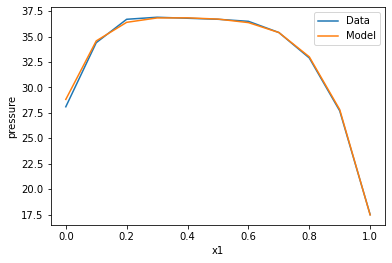

In [ ]:
pressure = pressure.detach().numpy()

plt.plot(x, p, label='Data')
plt.plot(x, pressure, label='Model')
plt.legend()
plt.xlabel('x1')
plt.ylabel('pressure')
plt.show()

The data fits the model well.

**Problem 2**

In [ ]:
# %pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.externals._packaging.version import Infinity

def f(x1, x2):
  return -((4 - 2.1 * x1 ** 2 + x1 ** 4 / 3) * x1 ** 2 + x1 * x2 + (-4 + 4 * x2 ** 2) * x2 ** 2)
  # negate output so that 'maximize' finds minimum of original f

bounds = {'x1': (-3, 3), 'x2': (-2, 2)}

optimizer = BayesianOptimization(f=f, pbounds=bounds, random_state=1)

optimizer.maximize(init_points=20, n_iter=80)

optimal_point = -Infinity
res = optimizer.res
index = 0

for i in range(100):
  if res[i]['target'] > optimal_point:
    optimal_point = res[i]['target']
    index = i

print(res[index]['params'])
print('f(x1, x2):', -res[index]['target'])

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -40.85    |  1.804    |  1.873    |
|  12       | -0.5433   | -1.119    |  0.7693   |
|  13       | -28.42    |  2.258    |  1.578    |
|  14       | -60.72    | -2.49     | -1.844    |
|  15       | -12.29    | -1.981    |  1.513    |
|  16       | -18.1     | -2.41     | -0.3156   |
|  17       | -54.18    |  2.747    |  0.1327   |
|  18       | -0.547    |  1.151    | -0.7379   |
